<a href="https://colab.research.google.com/github/ElsCorporation/ChallengeAluraTelecomPt2/blob/main/Callenge_Alura_TelecomX_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Extração do Arquivo Tratado

In [ ]:
url = 'https://raw.githubusercontent.com/ElsCorporation/ChallengeAluraTelecomPt2/refs/heads/main/dados_telecom_x.csv'
dados = pd.read_csv(url)
dados.head()

,cliente_ID,Churn,cliente_genero,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,telefone_multiplas_linhas,internet_servico,...,internet_protecao_dispositivo,internet_suporte_tecnico,internet_streaming_tv,internet_streaming_filmes,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_mensal,conta_total,Contas_Diarias
0,0002-ORFBO,No,Feminino,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.20
1,0003-MKNFE,No,Masculino,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.01
2,0004-TLHLJ,Yes,Masculino,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.34
3,0011-IGKFF,Yes,Masculino,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.17
4,0013-EXCHZ,Yes,Feminino,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.97


# Remoção de Colunas Irrelevantes

---



In [ ]:
dados.columns

Index(['cliente_ID', 'Churn', 'cliente_genero', 'cliente_senior',
       'cliente_parceiro', 'cliente_dependentes', 'cliente_tenure',
       'telefone_servico', 'telefone_multiplas_linhas', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'internet_streaming_tv', 'internet_streaming_filmes', 'conta_contrato',
       'conta_fatura_online', 'conta_metodo_pagamento', 'conta_mensal',
       'conta_total', 'Contas_Diarias'],
      dtype='object')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_ID                     7043 non-null   object 
 1   Churn                          7043 non-null   object 
 2   cliente_genero                 7043 non-null   object 
 3   cliente_senior                 7043 non-null   int64  
 4   cliente_parceiro               7043 non-null   int64  
 5   cliente_dependentes            7043 non-null   int64  
 6   cliente_tenure                 7043 non-null   int64  
 7   telefone_servico               7043 non-null   int64  
 8   telefone_multiplas_linhas      7043 non-null   object 
 9   internet_servico               7043 non-null   object 
 10  internet_seguranca_online      7043 non-null   object 
 11  internet_backup_online         7043 non-null   object 
 12  internet_protecao_dispositivo  7043 non-null   o

In [ ]:
dados['internet_servico'].nunique()

3

In [ ]:
colunas_remocao = {
    'cliente_ID',
    'cliente_genero',
    'telefone_multiplas_linhas',
    'internet_streaming_tv',
    'internet_streaming_filmes',
    'conta_mensal',
    'Contas_Diarias'
}

In [ ]:
dados_colunas_removidas = dados.drop(columns=colunas_remocao, axis=1)
dados_colunas_removidas.head()

,Churn,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,internet_servico,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_total
0,No,0,1,1,9,1,DSL,0,1,0,1,One year,1,Mailed check,593.30
1,No,0,0,0,9,1,DSL,0,0,0,0,Month-to-month,0,Mailed check,542.40
2,Yes,0,0,0,4,1,Fiber optic,0,0,1,0,Month-to-month,1,Electronic check,280.85
3,Yes,1,1,0,13,1,Fiber optic,0,1,1,0,Month-to-month,1,Electronic check,1237.85
4,Yes,1,1,0,3,1,Fiber optic,0,0,0,1,Month-to-month,1,Mailed check,267.40


In [ ]:
dados_colunas_removidas.columns

Index(['Churn', 'cliente_senior', 'cliente_parceiro', 'cliente_dependentes',
       'cliente_tenure', 'telefone_servico', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'conta_contrato', 'conta_fatura_online', 'conta_metodo_pagamento',
       'conta_total'],
      dtype='object')

In [ ]:
Adicionar_colunas_streaming = [
    'internet_streaming_tv',
    'internet_streaming_filmes',
]
dados_colunas_removidas = pd.concat([dados_colunas_removidas, dados[Adicionar_colunas_streaming]], axis=1)
dados_colunas_removidas.head()

,Churn,cliente_senior,cliente_parceiro,cliente_dependentes,cliente_tenure,telefone_servico,internet_servico,internet_seguranca_online,internet_backup_online,internet_protecao_dispositivo,internet_suporte_tecnico,conta_contrato,conta_fatura_online,conta_metodo_pagamento,conta_total,internet_streaming_tv,internet_streaming_filmes
0,No,0,1,1,9,1,DSL,0,1,0,1,One year,1,Mailed check,593.30,1,0
1,No,0,0,0,9,1,DSL,0,0,0,0,Month-to-month,0,Mailed check,542.40,0,1
2,Yes,0,0,0,4,1,Fiber optic,0,0,1,0,Month-to-month,1,Electronic check,280.85,0,0
3,Yes,1,1,0,13,1,Fiber optic,0,1,1,0,Month-to-month,1,Electronic check,1237.85,1,1
4,Yes,1,1,0,3,1,Fiber optic,0,0,0,1,Month-to-month,1,Mailed check,267.40,1,0


In [ ]:
dados_colunas_removidas['internet_streaming_tv'].unique()

array(['1', '0', 'No internet service'], dtype=object)

In [ ]:
dados_colunas_removidas.columns

Index(['Churn', 'cliente_senior', 'cliente_parceiro', 'cliente_dependentes',
       'cliente_tenure', 'telefone_servico', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'conta_contrato', 'conta_fatura_online', 'conta_metodo_pagamento',
       'conta_total', 'internet_streaming_tv', 'internet_streaming_filmes'],
      dtype='object')

In [ ]:
AjusteColunas = [
    'internet_seguranca_online',
    'internet_backup_online',
    'internet_protecao_dispositivo',
    'internet_suporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_filmes',
]

for col in AjusteColunas:
    dados_colunas_removidas[col] = dados_colunas_removidas[col].replace(0, '0')

dados_colunas_removidas['internet_streaming_tv'].unique()

array(['1', '0'], dtype=object)

In [ ]:
dados_colunas_removidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7043 non-null   object 
 1   cliente_senior                 7043 non-null   int64  
 2   cliente_parceiro               7043 non-null   int64  
 3   cliente_dependentes            7043 non-null   int64  
 4   cliente_tenure                 7043 non-null   int64  
 5   telefone_servico               7043 non-null   int64  
 6   internet_servico               7043 non-null   object 
 7   internet_seguranca_online      7043 non-null   object 
 8   internet_backup_online         7043 non-null   object 
 9   internet_protecao_dispositivo  7043 non-null   object 
 10  internet_suporte_tecnico       7043 non-null   object 
 11  conta_contrato                 7043 non-null   object 
 12  conta_fatura_online            7043 non-null   i

In [ ]:
AjusteColunasAstype = [
    'internet_seguranca_online',
    'internet_backup_online',
    'internet_protecao_dispositivo',
    'internet_suporte_tecnico',
    'internet_streaming_tv',
    'internet_streaming_filmes',
]

for col in AjusteColunasAstype:
    dados_colunas_removidas[col] = dados_colunas_removidas[col].astype(int)

dados_colunas_removidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7043 non-null   object 
 1   cliente_senior                 7043 non-null   int64  
 2   cliente_parceiro               7043 non-null   int64  
 3   cliente_dependentes            7043 non-null   int64  
 4   cliente_tenure                 7043 non-null   int64  
 5   telefone_servico               7043 non-null   int64  
 6   internet_servico               7043 non-null   object 
 7   internet_seguranca_online      7043 non-null   int64  
 8   internet_backup_online         7043 non-null   int64  
 9   internet_protecao_dispositivo  7043 non-null   int64  
 10  internet_suporte_tecnico       7043 non-null   int64  
 11  conta_contrato                 7043 non-null   object 
 12  conta_fatura_online            7043 non-null   i

In [ ]:
dados_colunas_removidas['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
dados_colunas_removidas['Churn'] = dados_colunas_removidas['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)
dados_colunas_removidas['Churn']

/tmp/ipython-input-3885971513.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_colunas_removidas['Churn'] = dados_colunas_removidas['Churn'].replace({'No': 0, 'Yes': 1}).astype(int)


,Churn
0,0
1,0
2,1
3,1
4,1
...,...
7038,0
7039,1
7040,0
7041,0


In [ ]:
dados_colunas_removidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Churn                          7043 non-null   int64  
 1   cliente_senior                 7043 non-null   int64  
 2   cliente_parceiro               7043 non-null   int64  
 3   cliente_dependentes            7043 non-null   int64  
 4   cliente_tenure                 7043 non-null   int64  
 5   telefone_servico               7043 non-null   int64  
 6   internet_servico               7043 non-null   object 
 7   internet_seguranca_online      7043 non-null   int64  
 8   internet_backup_online         7043 non-null   int64  
 9   internet_protecao_dispositivo  7043 non-null   int64  
 10  internet_suporte_tecnico       7043 non-null   int64  
 11  conta_contrato                 7043 non-null   object 
 12  conta_fatura_online            7043 non-null   i

In [ ]:
dados_colunas_removidas = pd.concat([dados_colunas_removidas, dados['cliente_genero']], axis=1)
dados_colunas_removidas['cliente_genero']

,cliente_genero
0,Feminino
1,Masculino
2,Masculino
3,Masculino
4,Feminino
...,...
7038,Feminino
7039,Masculino
7040,Masculino
7041,Masculino


# Encoding

In [ ]:
dados_colunas_removidas.columns

Index(['Churn', 'cliente_senior', 'cliente_parceiro', 'cliente_dependentes',
       'cliente_tenure', 'telefone_servico', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'conta_contrato', 'conta_fatura_online', 'conta_metodo_pagamento',
       'conta_total', 'internet_streaming_tv', 'internet_streaming_filmes',
       'cliente_genero'],
      dtype='object')

In [ ]:
colunas_categoricas = [
        'Churn', 'cliente_senior', 'cliente_parceiro', 'cliente_dependentes',
        'telefone_servico', 'internet_servico',
       'internet_seguranca_online', 'internet_backup_online',
       'internet_protecao_dispositivo', 'internet_suporte_tecnico',
       'conta_contrato', 'conta_fatura_online', 'conta_metodo_pagamento',
      'internet_streaming_tv', 'internet_streaming_filmes',
       'cliente_genero'
]

In [ ]:
dados_encoded = pd.get_dummies(dados_colunas_removidas, columns=colunas_categoricas, drop_first = True)
dados_encoded.head()

,cliente_tenure,conta_total,Churn_1,cliente_senior_1,cliente_parceiro_1,cliente_dependentes_1,telefone_servico_1,internet_servico_Fiber optic,internet_servico_No,internet_seguranca_online_1,...,internet_suporte_tecnico_1,conta_contrato_One year,conta_contrato_Two year,conta_fatura_online_1,conta_metodo_pagamento_Credit card (automatic),conta_metodo_pagamento_Electronic check,conta_metodo_pagamento_Mailed check,internet_streaming_tv_1,internet_streaming_filmes_1,cliente_genero_Masculino
0,9,593.30,False,False,True,True,True,False,False,False,...,True,True,False,True,False,False,True,True,False,False
1,9,542.40,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,True
2,4,280.85,True,False,False,False,True,True,False,False,...,False,False,False,True,False,True,False,False,False,True
3,13,1237.85,True,True,True,False,True,True,False,False,...,False,False,False,True,False,True,False,True,True,True
4,3,267.40,True,True,True,False,True,True,False,False,...,True,False,False,True,False,False,True,True,False,False


In [ ]:
dados_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   cliente_tenure                                  7043 non-null   int64  
 1   conta_total                                     7032 non-null   float64
 2   Churn_1                                         7043 non-null   bool   
 3   cliente_senior_1                                7043 non-null   bool   
 4   cliente_parceiro_1                              7043 non-null   bool   
 5   cliente_dependentes_1                           7043 non-null   bool   
 6   telefone_servico_1                              7043 non-null   bool   
 7   internet_servico_Fiber optic                    7043 non-null   bool   
 8   internet_servico_No                             7043 non-null   bool   
 9   internet_seguranca_online_1              

In [ ]:
dados_encoded.isnull().sum()

,0
cliente_tenure,0
conta_total,11
Churn_1,0
cliente_senior_1,0
cliente_parceiro_1,0
cliente_dependentes_1,0
telefone_servico_1,0
internet_servico_Fiber optic,0
internet_servico_No,0
internet_seguranca_online_1,0


In [ ]:
dados_encoded = dados_encoded.dropna(axis=1)
dados_encoded.isnull().sum()


,0
cliente_tenure,0
Churn_1,0
cliente_senior_1,0
cliente_parceiro_1,0
cliente_dependentes_1,0
telefone_servico_1,0
internet_servico_Fiber optic,0
internet_servico_No,0
internet_seguranca_online_1,0
internet_backup_online_1,0


# Verificação da Proporção de Evasão

In [ ]:
dados_encoded.value_counts('Churn_1')

,count
Churn_1,
False,5174
True,1869


# Análise de Correlação

In [ ]:
corr = dados_encoded.corr()

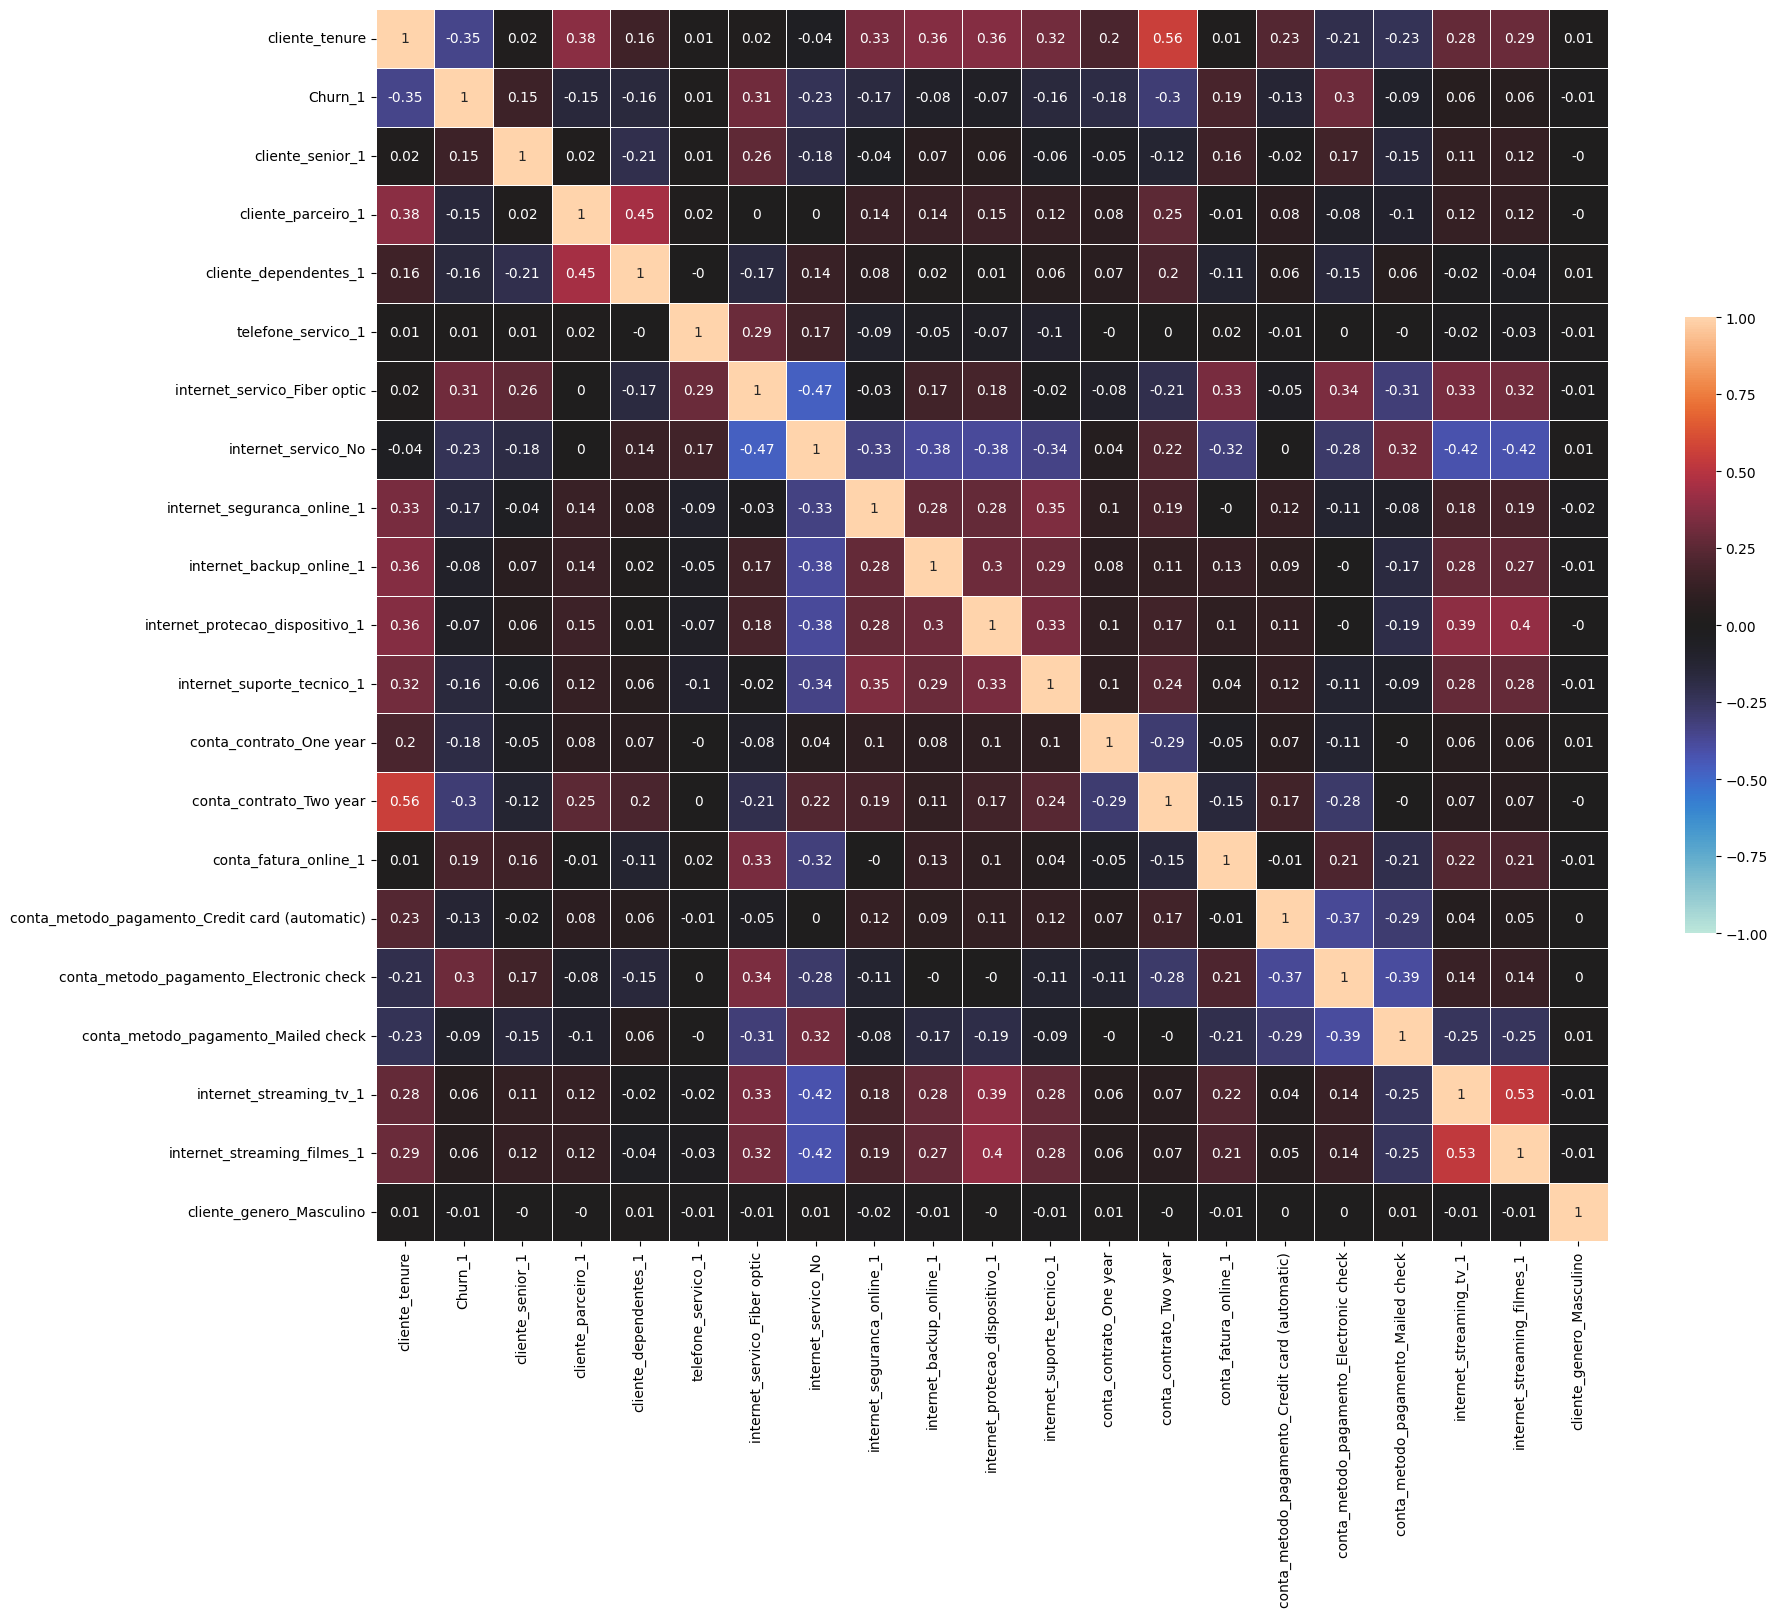

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

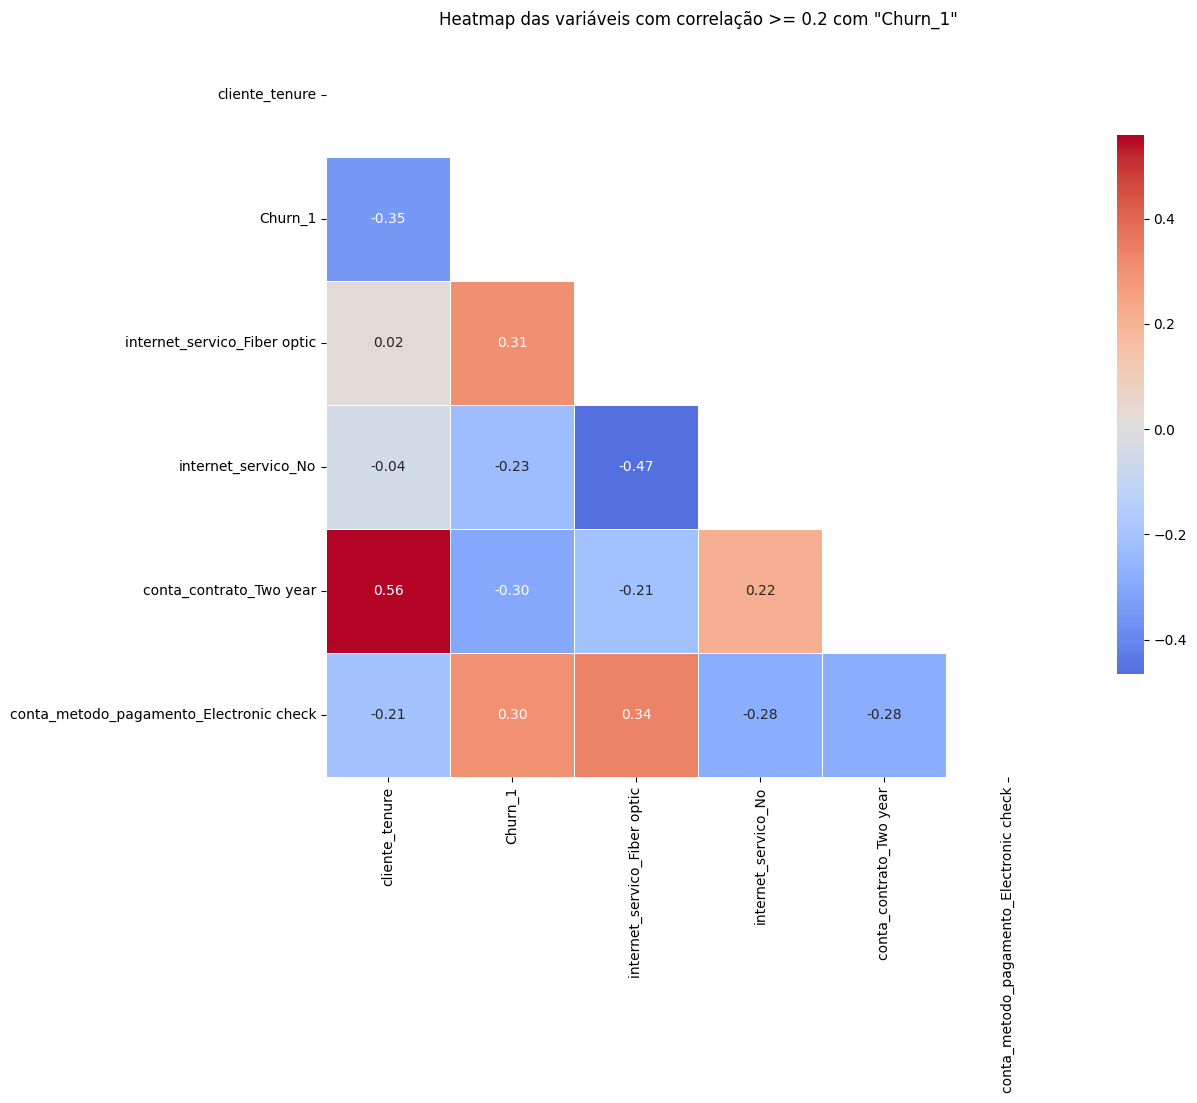

In [ ]:
variavel_alvo = 'Churn_1'
limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[variavel_alvo]) >= limiar].tolist()

if variavel_alvo not in variaveis_relevantes:
    variaveis_relevantes.append(variavel_alvo)

corr_filtro = corr.loc[variaveis_relevantes, variaveis_relevantes]
mascara = np.triu(np.ones_like(corr_filtro, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtro,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap das variáveis com correlação >= {limiar} com "{variavel_alvo}"')
plt.show()



# Criação de Modelos

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [ ]:
X = dados_encoded.drop(columns=['Churn_1'])
y = dados_encoded['Churn_1']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

# Regressão Logística

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Regressão Logística")
print("Acurácia:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regressão Logística
Acurácia: 0.751538097491718
ROC AUC: 0.8372308975136447
Matriz de Confusão:
 [[1147  405]
 [ 120  441]]
              precision    recall  f1-score   support

       False       0.91      0.74      0.81      1552
        True       0.52      0.79      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



# Random Forest

In [ ]:
# Instanciar e treinar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Avaliação
print("Random Forest")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7572172266919073
ROC AUC: 0.8005029448517927
Matriz de Confusão:
 [[1292  260]
 [ 253  308]]
              precision    recall  f1-score   support

       False       0.84      0.83      0.83      1552
        True       0.54      0.55      0.55       561

    accuracy                           0.76      2113
   macro avg       0.69      0.69      0.69      2113
weighted avg       0.76      0.76      0.76      2113



# Conclusão

<img src = "https://raw.githubusercontent.com/ElsCorporation/ChallengeAluraTelecomPt2/refs/heads/main/churn.png">

Fatores que mais influenciam a evasão:

* **Clientes antigos tendem a ficar**:
Novos usuários são menos fidelizados!

* **Usuários de fibra são mais propensos a sair**:
Pode ser indicativo de expectativas altas de qualidade e/ou sensibilidade a preço.
* **Cheque eletrônico tendem a ter mais evasão do que ou outros métodos de pagamento**;

* **Quem não tem serviço de internet tende a permanecer.** Podem ser usuários menos exigentes ou de serviços básicos.

# Estratégias de Retenção:

* **Medidas de Fortalecimento de Retenção nos primeiros meses:**
 - Beneficios Graduais para estimular a permanência;
 - Contato proativo para clientes recentes, com check-in personalizado

* **Migração de Clientes para Planos de Longo Prazo:**
 - Ofereçer descontos ou bônus para contratos anuais ou bienais.
 - Comunicação clara dos benefícios do compromisso.
 - Experiência de cancelamento sem atrito + reengajamento.

* **Qualidade de Serviço para Fibra Óptica: **
 - Monitoramento constante e/ou proativo.
 - Suporte Ágil.
 - Atualização gratuita de equipamento.
 - Planos com valor agregado que melhorem percepção (streaming, roteadores premium).

* **Troca de Método de Pagamento:**
 - Icentivar a migração para outros métodos de pagamento, como débito ou cartão.
 - Oferecer cashback, sistema de pontos ou sorteios.
 - Simplificação para a mudança de método.
 - Alertar a falta de pagamento, porém, de forma empática e atenciosa.

* **Criação de Ofertas sob Medida para Usuários sem Internet:**
 - Upsell cuidadoso com demonstração de valor.
 - Indicar ofertas segmentadas, como por exemplo, serviços digitais ou somente mobile.


